## **Dataset**
[https://brasil.io/dataset/covid19/caso](https://brasil.io/dataset/covid19/caso)

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/MarceloAugustoMathias/covid-19/master/ComparandoEstados_BR/covid-brasil.csv')

In [168]:
df

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-01,AC,Acrelândia,city,8,0.0,True,15256.0,1200013.0,52.43838,NaN
1,2020-04-01,AC,Porto Acre,city,1,0.0,True,18504.0,1200807.0,5.40424,NaN
2,2020-04-01,AC,Rio Branco,city,34,0.0,True,407319.0,1200401.0,8.34727,NaN
3,2020-04-01,AC,NaN,state,43,0.0,True,881935.0,12.0,4.87564,NaN
4,2020-04-01,AL,Importados/Indefinidos,city,4,0.0,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4069,2020-02-28,SP,NaN,state,2,NaN,False,45919049.0,35.0,0.00436,NaN
4070,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4071,2020-02-27,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN
4072,2020-02-26,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN


In [139]:
df.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population_2019', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [0]:
df.columns = ['Data', 'Estado', 'Cidade', 'Tipo_Local', 'Confirmados', 'Mortes', 'E_Ultimo', 'Pop_Estimada_2019', 'Codigo_IBGE', 'Confirmados_por100k', 'Taxa_Mortalidade']

In [141]:
df.tail()

,Data,Estado,Cidade,Tipo_Local,Confirmados,Mortes,E_Ultimo,Pop_Estimada_2019,Codigo_IBGE,Confirmados_por100k,Taxa_Mortalidade
4069,2020-02-28,SP,NaN,state,2,NaN,False,45919049.0,35.0,0.00436,NaN
4070,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4071,2020-02-27,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN
4072,2020-02-26,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4073,2020-02-26,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN


In [142]:
#loc[ linhas , colunas ]
estados = df.loc[df.Tipo_Local == 'state', : ]
estados.head()

,Data,Estado,Cidade,Tipo_Local,Confirmados,Mortes,E_Ultimo,Pop_Estimada_2019,Codigo_IBGE,Confirmados_por100k,Taxa_Mortalidade
3,2020-04-01,AC,NaN,state,43,0.0,True,881935.0,12.0,4.87564,NaN
7,2020-04-01,AL,NaN,state,18,1.0,True,3337357.0,27.0,0.53935,0.0556
17,2020-04-01,AM,NaN,state,200,3.0,True,4144597.0,13.0,4.82556,0.0150
19,2020-04-01,AP,NaN,state,11,0.0,True,845731.0,16.0,1.30065,NaN
54,2020-04-01,BA,NaN,state,246,2.0,True,14873064.0,29.0,1.65400,0.0081


In [143]:
estados.Estado.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [144]:
len(estados.Estado.unique())

27

In [0]:
data = estados[['Data', 'Estado', 'Confirmados', 'Mortes', 'E_Ultimo']]

In [146]:
data.head()

,Data,Estado,Confirmados,Mortes,E_Ultimo
3,2020-04-01,AC,43,0.0,True
7,2020-04-01,AL,18,1.0,True
17,2020-04-01,AM,200,3.0,True
19,2020-04-01,AP,11,0.0,True
54,2020-04-01,BA,246,2.0,True


In [0]:
covid_br = pd.DataFrame()

In [0]:
#estado = "SP"
#situacao = "Mortes"

#df_estado = data.loc[data.Estado == estado, : ]
#df_estado = df_estado.groupby('Data').sum()[situacao].reset_index()
#df_estado = df_estado.drop('Data', axis=1)
#df_estado.columns = [estado]

#covid_br = pd.concat([covid_br, df_estado], ignore_index=False, axis=1)
#covid_br


In [0]:
def comp_estado(data, estados, dias, situacao):
    covid_br = pd.DataFrame()

    for estado in estados:
        try:
            df_estado = data.loc[data.Estado == estado, : ]
            df_estado = df_estado.groupby('Data').sum()[situacao].reset_index()
            df_estado = df_estado.drop('Data', axis=1)
            df_estado.columns = [estado]

            covid_br = pd.concat([covid_br, df_estado], ignore_index=False, axis=1)
        except:
            print("Alguma informação esta incorreta")
    
    return covid_br.head(dias)

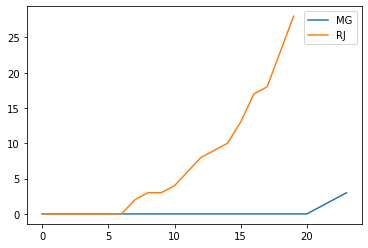

In [166]:
comparacao = comp_estado(data, ['MG', 'RJ'], 45 ,'Mortes')
comparacao.plot()

In [162]:
comparacao

,SP,CE
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
